## 0. 데이터 전처리

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns 

fm=mp.font_manager.FontManager()
plt.rcParams['font.family']='Malgun Gothic'

#plt.style.use("seaborn-pastel")
plt.style.use("fivethirtyeight")

In [4]:
diaDF=pd.read_csv('data/diamonds.csv', encoding='cp949')
diaDF

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [6]:
#결측치 확인
diaDF.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [8]:
#Unnamed행은 단순 숫번나열이므로 삭제 
diaDF=diaDF.drop(['Unnamed: 0'],axis=1)
diaDF

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [13]:
#53940개 데이터, 10개 변수 
diaDF.shape

(53920, 10)

In [9]:
#기초통계량 값 확인 
diaDF.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [10]:
# x(길이), y(너비), z(깊이)가 0인 값은 결측치로 간주하여 삭제 
diaDF.drop(diaDF[diaDF['x']==0].index,inplace=True)
diaDF.drop(diaDF[diaDF['y']==0].index,inplace=True)
diaDF.drop(diaDF[diaDF['z']==0].index,inplace=True)

In [11]:
#기초통계량 
diaDF.describe()

,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [12]:
#Dtype 매칭 확인 
diaDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53920 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53920 non-null  float64
 1   cut      53920 non-null  object 
 2   color    53920 non-null  object 
 3   clarity  53920 non-null  object 
 4   depth    53920 non-null  float64
 5   table    53920 non-null  float64
 6   price    53920 non-null  int64  
 7   x        53920 non-null  float64
 8   y        53920 non-null  float64
 9   z        53920 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [ ]:
# carat : 다이아몬드의 캐럿 무게
# cut : 다이아몬드의 절단 품질 (Fair, Good, Very Good, Premium, Ideal )
# color : 다이아몬드 색상, J(최악)에서 D(최상)
# clarity : 다이아몬드의 투명도 측정(I1(최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(최고))
# depth : 큐렛에서 테이블까지 측정한 다이아몬드의 높이를 평균 거들 직경으로 나눈 값(%)
# table : 다이아몬드 테이블의 너비는 평균 직경의 백분율로 표시
# price : 다이아몬드의 가격
# x : 길이(mm)(0--10.74)
# y : 너비(mm)(0--58.9)
# z : 깊이(mm(0--31.8)

In [16]:
diaDF.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 1. 데이터 시각화

|**변수명**|**값 설명**|
|:-----|:-----|
|**carat**|다이아몬드의 캐럿 무게|
|**cut**|다이아몬드의 절단 품질 (Fair, Good, Very Good, Premium, Ideal |
|**color**|다이아몬드 색상, J(최악)에서 D(최상)|
|**clarity**|다이아몬드의 투명도 측정(I1(최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(최고))|
|**depth**|큐렛에서 테이블까지 측정한 다이아몬드의 높이를 평균 거들 직경으로 나눈 값(%)|
|**table**|다이아몬드 테이블의 너비는 평균 직경의 백분율로 표시|
|**price**|다이아몬드의 가격|
|**x**|길이(mm)(0--10.74)|
|**y**|너비(mm)(0--58.9)|
|**z**|깊이(mm(0--31.8)|

In [94]:
#변수 별 상관관계
diaDF.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


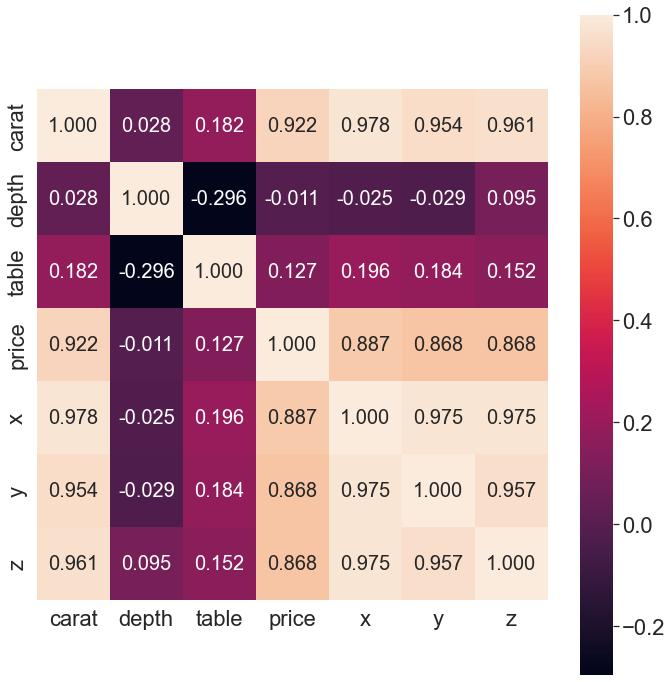

In [106]:
plt.figure(figsize=(10,10))
sns.set(font_scale=2.0) # 레이블의 폰트 사이즈를 조정

sns.heatmap(diaDF.corr(),# 데이터
                          cbar = True, # 오른쪽 컬러 막대 출력 여부
                          annot = True, # 차트에 상관계수 값을 보여줄 것인지 여부
                          annot_kws={'size' : 20}, # 숫자 출력 시 숫자 크기 조절
                           fmt = '.3f', # 숫자의 출력 소수점자리 개수 조절
                           square = 'True') # 차트를 정사각형으로 할 것인지
                         # yticklabels=corr_column_names, # y축에 컬럼명 출력
                         # xticklabels=corr_column_names) # x축에 컬럼명 출력
plt.tight_layout()
plt.show()

In [ ]:
- 무게 & 가격 : 0.92 높은 양의 상관관계
- 무게 & 길이 : 0.97 높은 양의 상관관계
- 무게 & 너비 : 0.95 높은 양의 상관관계
- 무게 & 깊이 : 0.96 높은 양의 상관관계
    
- 가격 & 무게 : 0.92 높은 양의 상관관계
- 가격 & 길이 : 0.88 높은 양의 상관관계
- 가격 & 너비 : 0.86 높은 양의 상관관계
- 가격 & 깊이 : 0.86 높은 양의 상관관계
    
#피어슨의 상관계수는 일반적으로,
#값이 -1.0 ~ -0.7 이면, 강한 음적 상관관계
#값이 -0.7 ~ -0.3 이면, 뚜렷한 음적 상관관계
#값이 -0.3 ~ -0.1 이면, 약한 음적 상관관계
#값이 -0.1 ~ +0.1 이면, 없다고 할 수 있는 상관관계
#값이 +0.1 ~ +0.3 이면, 약한 양적 상관관계
#값이 +0.3 ~ +0.7 이면, 뚜렷한 양적 상관관계
#값이 +0.7 ~ +1.0 이면, 강한 양적 상관관계

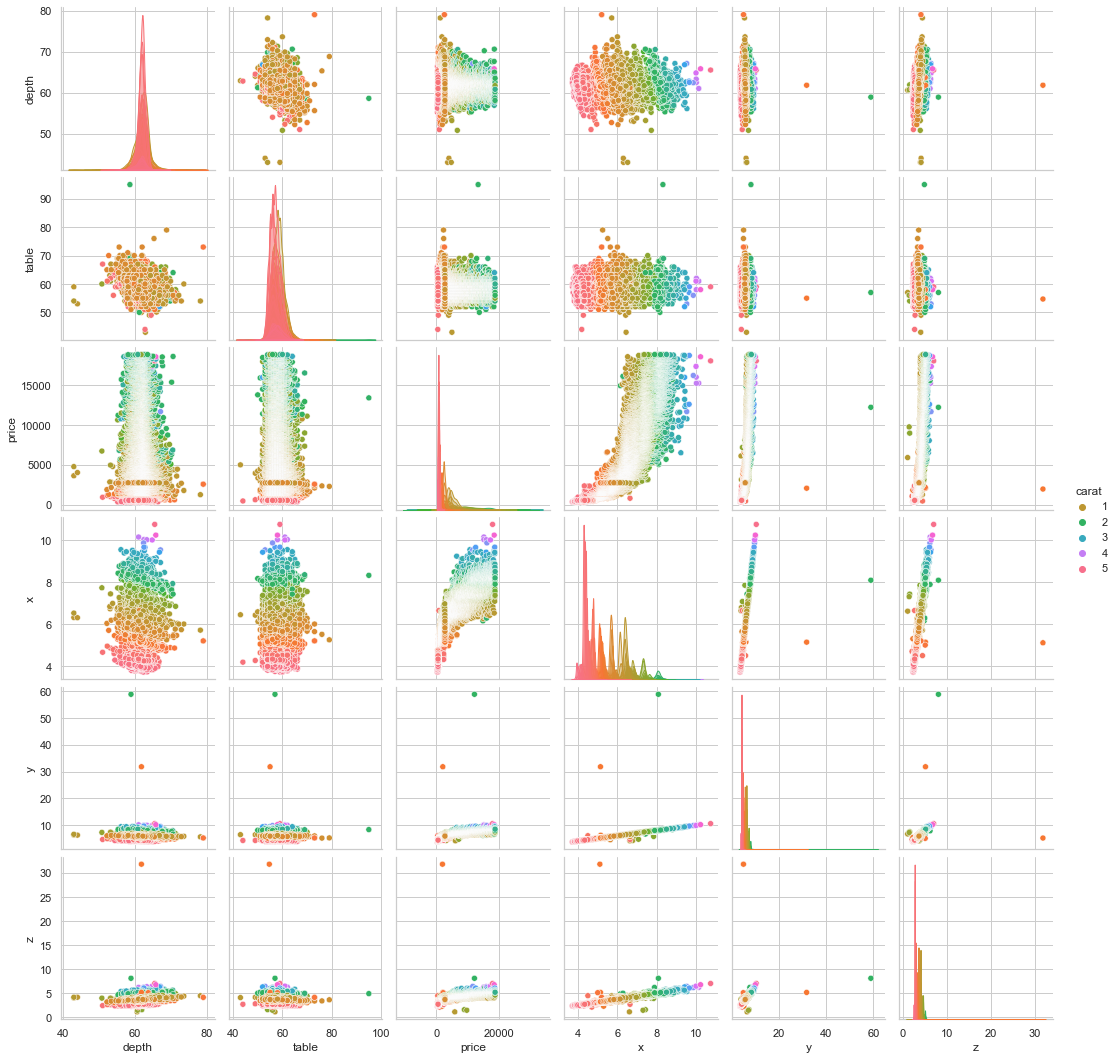

In [110]:
sns.set(style='whitbegrid') # whitegrid = 배경에 하얀 선
sns.pairplot(diaDF, hue='carat', palette='husl')
plt.show()

<Figure size 1080x1080 with 0 Axes>

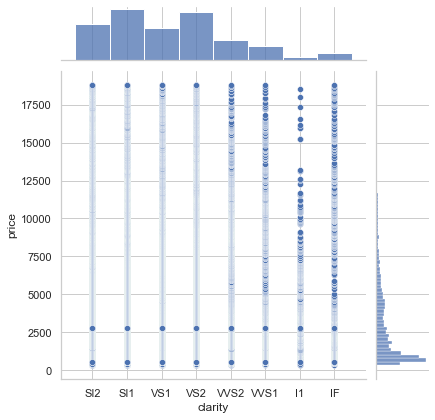

In [127]:
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.jointplot(x='clarity', y='price', data=diaDF)
plt.show()
# clarity : 다이아몬드의 투명도 측정(I1(최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(최고))

<Figure size 1080x1080 with 0 Axes>

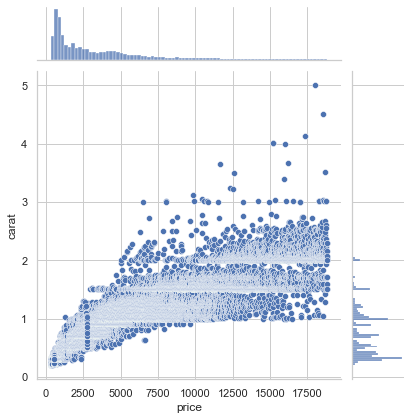

In [129]:
plt.figure(figsize=(15,15))
sns.set_style('whitegrid')
sns.jointplot(x='price', y='carat', data=diaDF)
plt.show()
#jointplot : 상관관계 및 히스토그램 
# clarity : 다이아몬드의 투명도 측정(I1(최악), SI2, SI1, VS2, VS1, VVS2, VVS1, IF(최고))

In [111]:
diaDF['carat']

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53920, dtype: float64

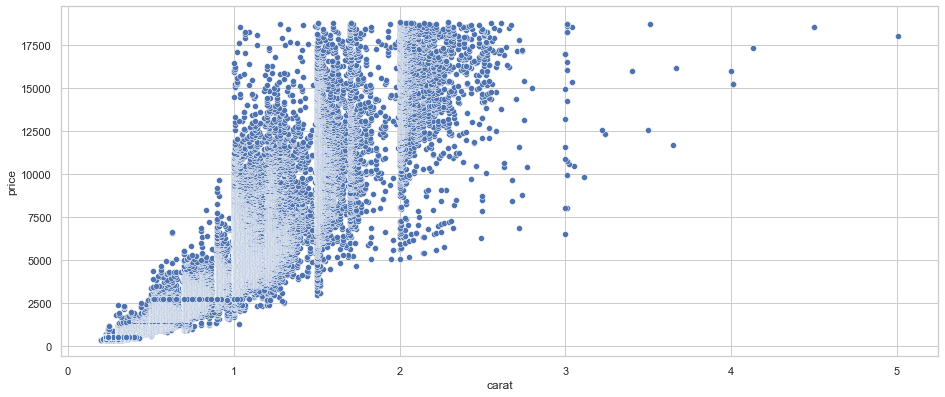

In [140]:
#두 연속변수의 관계 시각화 : 산점도
plt.figure(figsize=(14,6))
sns.scatterplot(x='carat', y='price', data=diaDF)
plt.show()

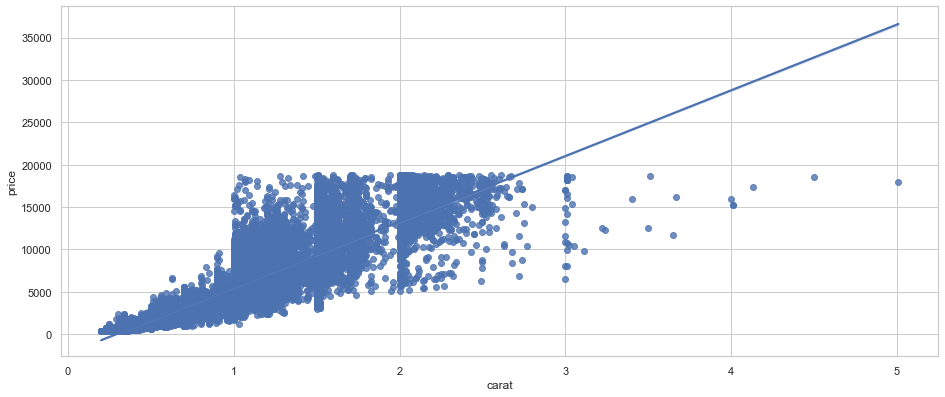

In [139]:
#산점도 + 추세선
plt.figure(figsize=(14,6))
sns.regplot(x='carat', y='price', data=diaDF)
plt.show()

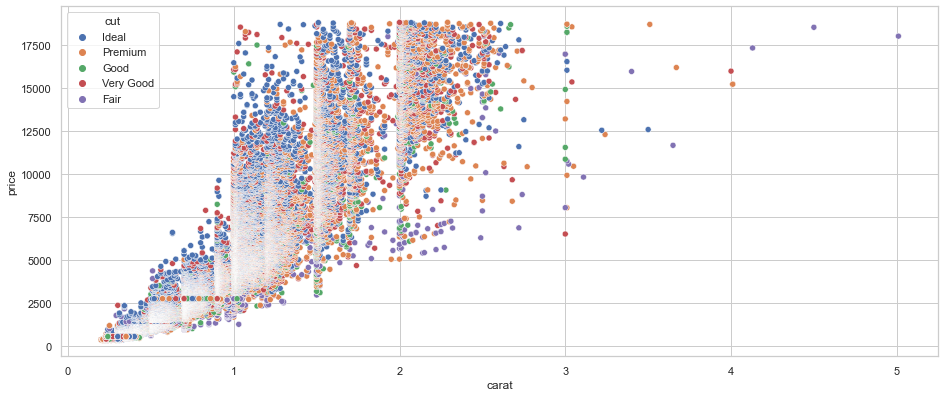

In [138]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='carat', y='price', hue='cut', data=diaDF)
plt.show()

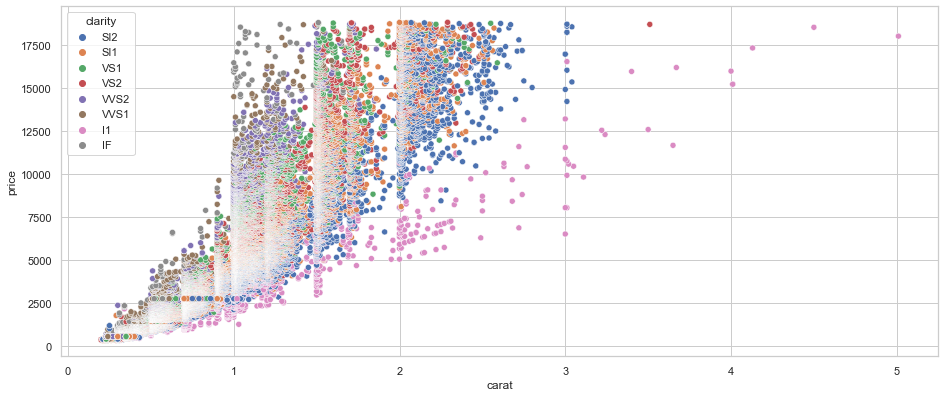

In [137]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='carat', y='price', hue='clarity', data=diaDF)
plt.show()

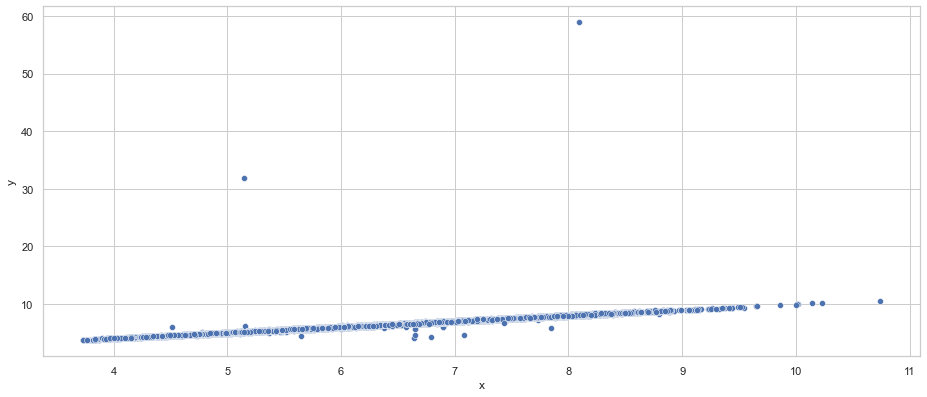

In [136]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='x', y='y', data=diaDF)
plt.show()

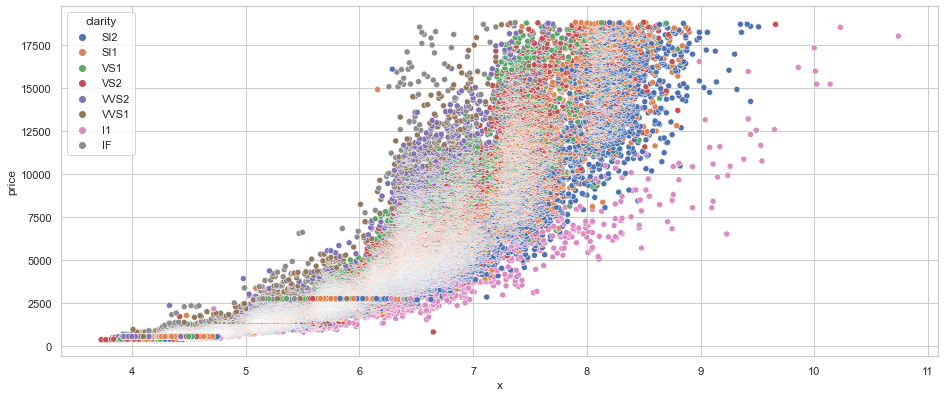

In [135]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='x', y='price', hue='clarity', data=diaDF)
plt.show()

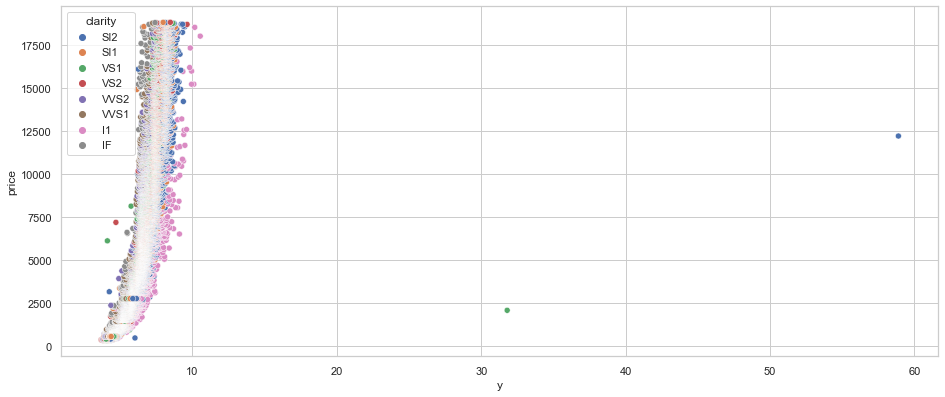

In [134]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='y', y='price', hue='clarity', data=diaDF)
plt.show()

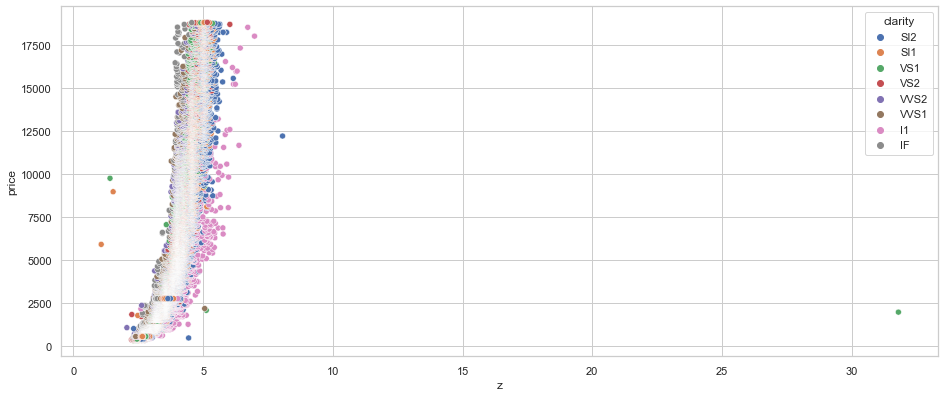

In [133]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='z', y='price', hue='clarity', data=diaDF)
plt.show()

<Figure size 720x432 with 0 Axes>

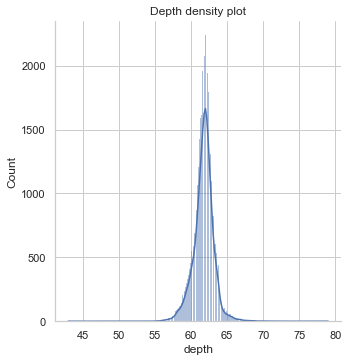

In [132]:
plt.figure(figsize=(10,6))
sns.displot(diaDF['depth'],kde=True)
plt.title('Depth density plot')
plt.show()

C:\Users\ajin1\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


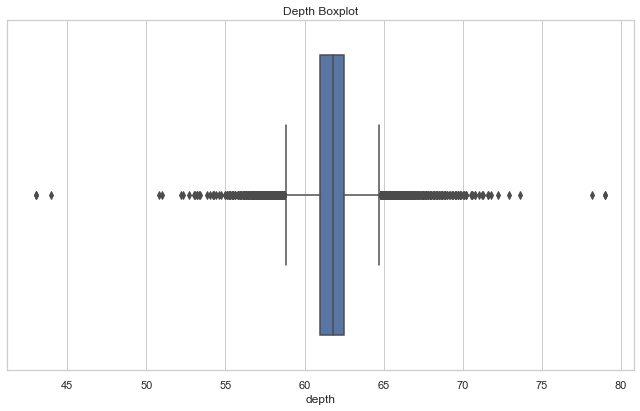

In [131]:
plt.figure(figsize=(10,6))
sns.boxplot(diaDF['depth'])
plt.title('Depth Boxplot')
plt.show()

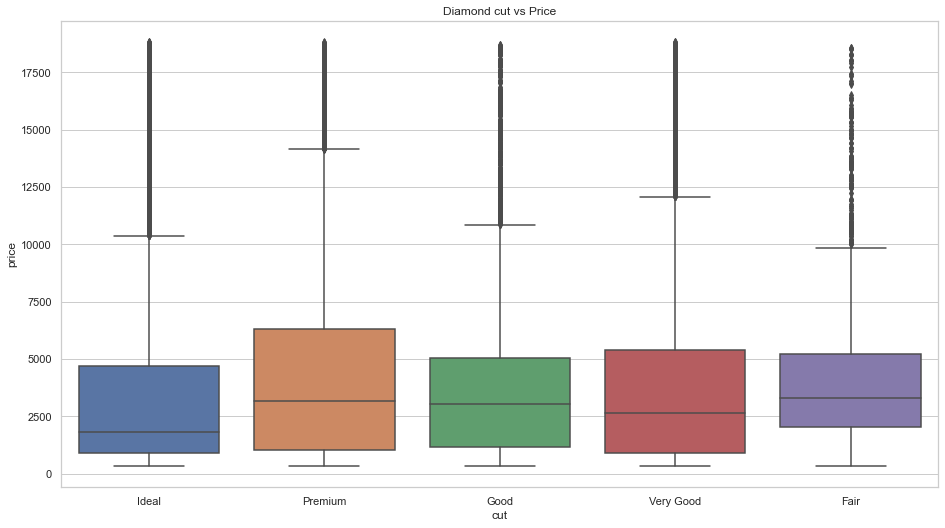

In [130]:
fig = plt.figure(figsize=(14,8))
sns.boxplot(y=diaDF['price'],x=diaDF['cut'])
plt.title("Diamond cut vs Price")
plt.show()
# cut : 다이아몬드의 절단 품질 (Fair, Good, Very Good, Premium, Ideal )

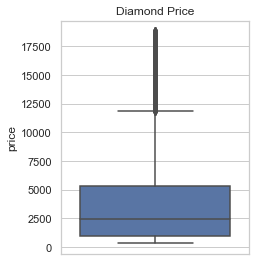

In [141]:
fig = plt.figure(figsize=(3,4))
sns.boxplot(y=diaDF['price'])
plt.title("Diamond Price")
plt.show()

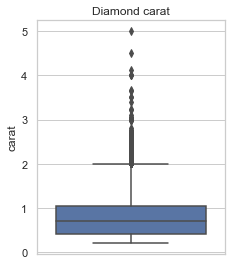

In [142]:
fig = plt.figure(figsize=(3,4))
sns.boxplot(y=diaDF['carat'])
plt.title("Diamond carat")
plt.show()

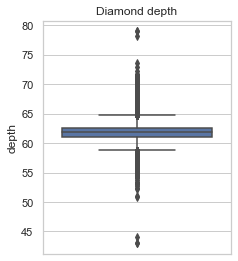

In [143]:
fig = plt.figure(figsize=(3,4))
sns.boxplot(y=diaDF['depth'])
plt.title("Diamond depth")
plt.show()

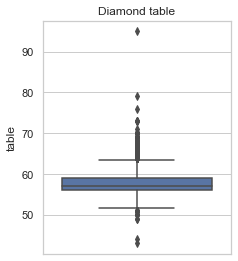

In [144]:
fig = plt.figure(figsize=(3,4))
sns.boxplot(y=diaDF['table'])
plt.title("Diamond table")
plt.show()

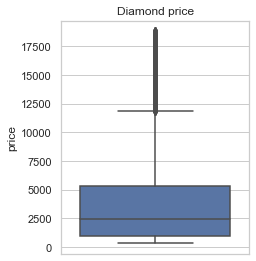

In [145]:
fig = plt.figure(figsize=(3,4))
sns.boxplot(y=diaDF['price'])
plt.title("Diamond price")
plt.show()

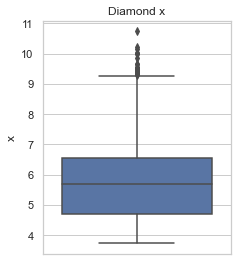

In [146]:
fig = plt.figure(figsize=(3,4))
sns.boxplot(y=diaDF['x'])
plt.title("Diamond x")
plt.show()

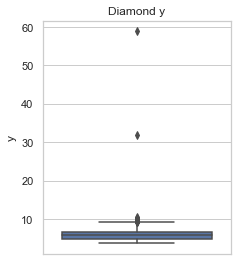

In [147]:
fig = plt.figure(figsize=(3,4))
sns.boxplot(y=diaDF['y'])
plt.title("Diamond y")
plt.show()

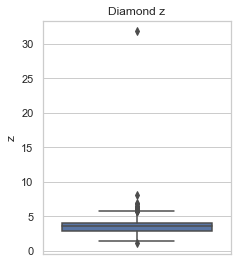

In [148]:
fig = plt.figure(figsize=(3,4))
sns.boxplot(y=diaDF['z'])
plt.title("Diamond z")
plt.show()

## 2. 모델링

In [149]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [76]:
df_final=diaDF.apply(LabelEncoder().fit_transform)
df_final.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,3,2,1,3,83,30,0,19,25,23
1,1,3,1,2,66,90,0,13,11,11
2,3,1,1,4,37,115,1,29,34,11
3,9,3,5,5,92,60,2,44,50,43
4,11,1,6,3,101,60,3,58,62,55


In [77]:
X = df_final.drop(['price'], axis=1)
y = df_final['price']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [79]:
mms=MinMaxScaler()

In [81]:
X_train=mms.fit_transform(X_train)
X_test=mms.transform(X_test)

In [82]:
X_train

array([[0.11070111, 1.        , 0.33333333, ..., 0.23956443, 0.2568306 ,
        0.26344086],
       [0.08487085, 1.        , 0.        , ..., 0.19600726, 0.19125683,
        0.22849462],
       [0.17343173, 0.75      , 0.5       , ..., 0.34482759, 0.33697632,
        0.3172043 ],
       ...,
       [0.07380074, 0.5       , 0.33333333, ..., 0.17604356, 0.18761384,
        0.19892473],
       [0.25830258, 0.75      , 1.        , ..., 0.43012704, 0.41894353,
        0.43548387],
       [0.37269373, 1.        , 0.16666667, ..., 0.54809437, 0.55737705,
        0.55645161]])

In [ ]:
#1)Linear Regression

In [83]:
lr=LinearRegression()
lr.fit(X_train,y_train)


y_pred=lr.predict(X_test)

accuracy_lr=cross_val_score(estimator = lr, X = X_train, y = y_train, cv = 8,verbose = 1)
score_lr=lr.score(X_test,y_test)
r2_lr=r2_score(y_test,y_pred)
mse_lr=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_lr}')
print(f'Score is {score_lr}')
print(f'r2_Score is {r2_lr}')
print(f'Mean Squared error is {mse_lr}')

Accuracy is [0.91336857 0.91208669 0.91954138 0.9083142  0.9162864  0.91060655
 0.91492293 0.91177829]
Score is 0.915694836282124
r2_Score is 0.915694836282124
Mean Squared error is 749343.6959060736


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.0s finished


In [ ]:
#2)AdaBoost Regression

In [84]:
ada_regr = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_regr.fit(X_train,y_train)


y_pred=ada_regr.predict(X_test)

accuracy_ada_regr=cross_val_score(estimator = ada_regr, X = X_train, y = y_train, cv = 8,verbose = 1)
score_ada_regr=ada_regr.score(X_test,y_test)
r2_ada_regr=r2_score(y_test,y_pred)
mse_ada_regr=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_ada_regr}')
print(f'Score is {score_ada_regr}')
print(f'r2_Score is {r2_ada_regr}')
print(f'Mean Squared error is {mse_ada_regr}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   30.7s finished


Accuracy is [0.91282892 0.91543222 0.91662843 0.91031405 0.92251523 0.90513557
 0.91888319 0.91195435]
Score is 0.8994387994798794
r2_Score is 0.8994387994798794
Mean Squared error is 893834.9484104106


In [ ]:
#3)Random Forest Regression

In [85]:
regr_rf = RandomForestRegressor(max_depth=2, random_state=0)
regr_rf.fit(X_train,y_train)


y_pred=regr_rf.predict(X_test)

accuracy_regr_rf=cross_val_score(estimator = regr_rf, X = X_train, y = y_train, cv = 8,verbose = 1)
score_regr_rf=regr_rf.score(X_test,y_test)
r2_regr_rf=r2_score(y_test,y_pred)
mse_regr_rf=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_regr_rf}')
print(f'Score is {score_regr_rf}')
print(f'r2_Score is {r2_regr_rf}')
print(f'Mean Squared error is {mse_regr_rf}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is [0.8725579  0.86807962 0.88285911 0.87277071 0.87363031 0.86539056
 0.86878231 0.87477645]
Score is 0.8732356836977011
r2_Score is 0.8732356836977011
Mean Squared error is 1126740.487745824


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.8s finished


In [ ]:
#4)KNeighbours Regressor

In [86]:
kneigh=KNeighborsRegressor(n_neighbors=2)
kneigh.fit(X_train,y_train)


y_pred=kneigh.predict(X_test)

accuracy_kneigh=cross_val_score(estimator = kneigh, X = X_train, y = y_train, cv = 8,verbose = 1)
score_kneigh=kneigh.score(X_test,y_test)
r2_kneigh=r2_score(y_test,y_pred)
mse_kneigh=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_kneigh}')
print(f'Score is {score_kneigh}')
print(f'r2_Score is {r2_kneigh}')
print(f'Mean Squared error is {mse_kneigh}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.9s finished


Accuracy is [0.9745395  0.97334976 0.9736448  0.96852385 0.97488079 0.97310177
 0.97459799 0.97314309]
Score is 0.9746511472018731
r2_Score is 0.9746511472018731
Mean Squared error is 225312.45068562435


In [ ]:
#5)Gradient Boosting Regressor

In [87]:
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,max_depth=1, random_state=0, loss='ls',verbose = 1)

gbr.fit(X_train,y_train)


y_pred=gbr.predict(X_test)

accuracy_gbr=cross_val_score(estimator = gbr, X = X_train, y = y_train, cv = 8,verbose = 1)
score_gbr=gbr.score(X_test,y_test)
r2_gbr=r2_score(y_test,y_pred)
mse_gbr=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_gbr}')
print(f'Score is {score_gbr}')
print(f'r2_Score is {r2_gbr}')
print(f'Mean Squared error is {mse_gbr}')

      Iter       Train Loss   Remaining Time 
         1     7896715.9506            1.92s
         2     6913311.1100            1.82s
         3     6106361.6218            1.71s
         4     5424489.9557            1.68s
         5     4846175.1059            1.66s
         6     4345123.5188            1.63s
         7     3918919.9146            1.62s
         8     3546822.7615            1.59s
         9     3223213.8862            1.60s
        10     2939614.6752            1.62s
        20     1487744.6363            1.41s
        30     1057764.2179            1.24s
        40      902605.5829            1.07s
        50      810514.1629            0.88s
        60      740889.0639            0.71s
        70      688374.1350            0.54s
        80      647323.3520            0.36s
        90      615613.7132            0.18s
       100      590491.7615            0.00s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


      Iter       Train Loss   Remaining Time 
         1     7884477.6021            1.67s
         2     6901873.8339            1.73s
         3     6095959.9263            1.68s
         4     5415898.3431            1.67s
         5     4838531.9156            1.63s
         6     4339309.4011            1.61s
         7     3917992.3927            1.62s
         8     3540098.8187            1.58s
         9     3219896.3294            1.57s
        10     2933604.2622            1.53s
        20     1487687.5404            1.36s
        30     1057054.7649            1.18s
        40      901352.5916            0.99s
        50      809145.3752            0.83s
        60      740010.4235            0.66s
        70      687461.7532            0.50s
        80      646663.0571            0.33s
        90      614759.8373            0.17s
       100      589427.6168            0.00s
      Iter       Train Loss   Remaining Time 
         1     7907583.2790            1.70s
        

[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.3s finished


In [ ]:
#6)Decision Tree Regressor

In [88]:
dtree = DecisionTreeRegressor(random_state = 0)

dtree.fit(X_train,y_train)


y_pred=dtree.predict(X_test)

accuracy_dtree=cross_val_score(estimator = dtree, X = X_train, y = y_train, cv = 8,verbose = 1)
score_dtree=dtree.score(X_test,y_test)
r2_dtree=r2_score(y_test,y_pred)
mse_dtree=mean_squared_error(y_test,y_pred)

print(f'Accuracy is {accuracy_dtree}')
print(f'Score is {score_dtree}')
print(f'r2_Score is {r2_dtree}')
print(f'Mean Squared error is {mse_dtree}')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Accuracy is [0.97643779 0.97675038 0.97831386 0.975906   0.97784824 0.9773007
 0.9764914  0.97762593]
Score is 0.9778718382162166
r2_Score is 0.9778718382162166
Mean Squared error is 196685.44373103292


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.6s finished


In [89]:
models=pd.DataFrame({'Model':['Linear Regression','AdaBoost Regression','RandomForest Regression','KNeighbour Regression','GradientBoosting Regression','Decision Tree Regressor'],
                     'Score':[r2_lr,r2_ada_regr,r2_regr_rf,r2_kneigh,r2_gbr,r2_dtree]
                    })

In [90]:
models

,Model,Score
0,Linear Regression,0.915695
1,AdaBoost Regression,0.899439
2,RandomForest Regression,0.873236
3,KNeighbour Regression,0.974651
4,GradientBoosting Regression,0.936713
5,Decision Tree Regressor,0.977872


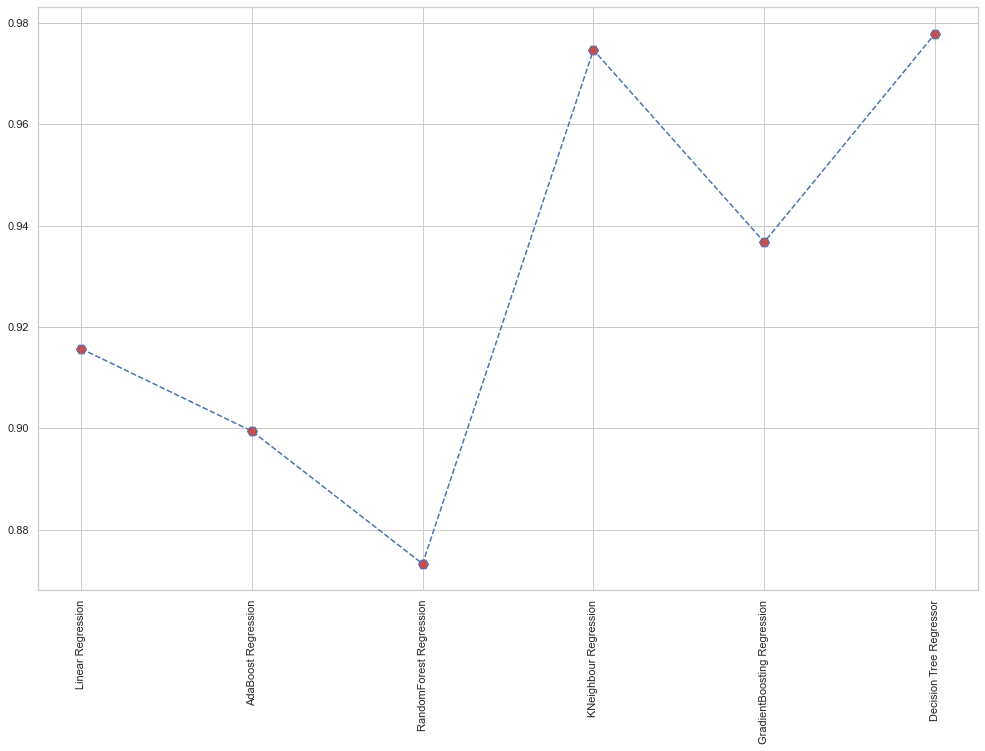

In [150]:
fig = plt.figure(figsize=(15,10))
plt.plot(models.Model,models.Score, linestyle = 'dashed',marker='H',mfc = 'r',ms = 10)
plt.xticks(rotation=90)
plt.show()